In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.preprocessing import scale
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
!pip install category_encoders
from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import FeatureUnion
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn import pipeline
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
!pip install catboost
!pip install ipywidgets
from catboost import CatBoostClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier as lgb
!pip3 install xgboost
import xgboost as xg
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from imblearn.over_sampling import SVMSMOTE, SMOTE, ADASYN, BorderlineSMOTE
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
path = '/content/gdrive/My Drive/eel891-2020ple-trabalho-1/Balanceado/'

In [3]:
!ls '/content/gdrive/My Drive/eel891-2020ple-trabalho-1/'


Balanceado		     exemplo_de_arquivo_de_respostas.csv
conjunto_de_teste.csv	     Test_Data_CATB_encoded.csv
conjunto_de_treinamento.csv  Training_data_imputed_CATB_SMOTEENN_resampled.csv
dicionario_de_dados.xlsx


# Load Data

In [4]:
df_treino = pd.read_csv(path+"conjunto_de_treinamento.csv")
df_teste = pd.read_csv(path+"conjunto_de_teste.csv")
#efetua o preprocessamento de uma vez num unico conjunto de dados
all_data = pd.concat([df_treino,df_teste],ignore_index=True)

In [5]:
df_treino.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

In [6]:
#as colunas que tinham mais de 50% dos dados faltantes serão excluidas 'profissao_companheiro','grau_instrucao_companheiro',
all_data.drop(columns=['grau_instrucao','id_solicitante','possui_telefone_celular','qtde_contas_bancarias_especiais'],inplace=True)

In [7]:
#Get Numerical/categorical columns
mask = all_data.dtypes == np.object
categorical_cols = list(all_data.columns[mask])
numerical_cols = list(all_data.select_dtypes(include=['int64','float64']).columns)

In [8]:
numerical_cols

['produto_solicitado',
 'dia_vencimento',
 'tipo_endereco',
 'idade',
 'estado_civil',
 'qtde_dependentes',
 'nacionalidade',
 'tipo_residencia',
 'meses_na_residencia',
 'possui_email',
 'renda_mensal_regular',
 'renda_extra',
 'possui_cartao_visa',
 'possui_cartao_mastercard',
 'possui_cartao_diners',
 'possui_cartao_amex',
 'possui_outros_cartoes',
 'qtde_contas_bancarias',
 'valor_patrimonio_pessoal',
 'possui_carro',
 'meses_no_trabalho',
 'profissao',
 'ocupacao',
 'profissao_companheiro',
 'grau_instrucao_companheiro',
 'local_onde_reside',
 'local_onde_trabalha',
 'inadimplente']

In [9]:
columns_to_encode = ['dia_vencimento','produto_solicitado','tipo_endereco','estado_civil','nacionalidade','tipo_residencia','profissao',
 'ocupacao','local_onde_reside','local_onde_trabalha']
for el in columns_to_encode:
    numerical_cols.remove(el)
categorical_cols.extend(columns_to_encode)
numerical_cols

['idade',
 'qtde_dependentes',
 'meses_na_residencia',
 'possui_email',
 'renda_mensal_regular',
 'renda_extra',
 'possui_cartao_visa',
 'possui_cartao_mastercard',
 'possui_cartao_diners',
 'possui_cartao_amex',
 'possui_outros_cartoes',
 'qtde_contas_bancarias',
 'valor_patrimonio_pessoal',
 'possui_carro',
 'meses_no_trabalho',
 'profissao_companheiro',
 'grau_instrucao_companheiro',
 'inadimplente']

In [10]:
categorical_cols

['forma_envio_solicitacao',
 'sexo',
 'estado_onde_nasceu',
 'estado_onde_reside',
 'possui_telefone_residencial',
 'codigo_area_telefone_residencial',
 'vinculo_formal_com_empresa',
 'estado_onde_trabalha',
 'possui_telefone_trabalho',
 'codigo_area_telefone_trabalho',
 'dia_vencimento',
 'produto_solicitado',
 'tipo_endereco',
 'estado_civil',
 'nacionalidade',
 'tipo_residencia',
 'profissao',
 'ocupacao',
 'local_onde_reside',
 'local_onde_trabalha']

# Detect missing data

In [11]:
missingValues = all_data[categorical_cols].isna().sum()
#mask = data.value > 0
col = []
qnt = []
perc = []
total = all_data[categorical_cols].shape[0]
for items in missingValues.iteritems():
    #print(items)
    if items[1] > 0:
        #print(items)
        col.append(items[0])
        qnt.append(items[1])
        perc.append((items[1]/total)*100)

In [12]:
all_data['local_onde_reside'].max()

999.0

In [13]:
"""all_data['profissao'] = all_data['profissao'].fillna(1000).astype(np.int)
all_data['ocupacao'] = all_data['ocupacao'].fillna(1000).astype(np.int)
all_data['tipo_residencia'] = all_data['tipo_residencia'].fillna(1000).astype(np.int)
all_data['local_onde_reside'] = all_data['local_onde_reside'].fillna(1000).astype(np.int)
all_data['local_onde_trabalha'] = all_data['local_onde_trabalha'].fillna(1000).astype(np.int)"""

"all_data['profissao'] = all_data['profissao'].fillna(1000).astype(np.int)\nall_data['ocupacao'] = all_data['ocupacao'].fillna(1000).astype(np.int)\nall_data['tipo_residencia'] = all_data['tipo_residencia'].fillna(1000).astype(np.int)\nall_data['local_onde_reside'] = all_data['local_onde_reside'].fillna(1000).astype(np.int)\nall_data['local_onde_trabalha'] = all_data['local_onde_trabalha'].fillna(1000).astype(np.int)"

In [14]:
new_df = pd.DataFrame({"":col,"Missing Ratio":perc,"Missing Number":qnt})
new_df

,,Missing Ratio,Missing Number
0,tipo_residencia,2.644,661
1,profissao,15.436,3859
2,ocupacao,14.672,3668


In [15]:
#Remove as colunas que tem mais de 50% de dados faltantes e transforma a variavel em ordinal
categorical_to_ordinal_encoding = {
                                    "dia_vencimento" : {1 : 0, 5 : 1, 10 : 2, 15 : 3, 20 : 4, 25:5}
                                  }
ordinal_cols = 'dia_vencimento'
#all_data.drop(columns=['id_solicitante','profissao_companheiro','grau_instrucao_companheiro'],inplace=True)

In [16]:
categorical_cols.append('profissao_companheiro')
categorical_cols.append('grau_instrucao_companheiro')
numerical_cols.remove('grau_instrucao_companheiro')
numerical_cols.remove('profissao_companheiro')


In [17]:
'dia_vencimento' in categorical_cols

True

In [18]:
input_cols = categorical_cols + numerical_cols
len(input_cols) == len(all_data.columns) 

True

In [19]:
input_cols.remove('inadimplente')
output_col = 'inadimplente'

# Check skewness

In [20]:
data_to_normalize = ['idade','qtde_dependentes','meses_na_residencia','renda_mensal_regular','renda_extra',
                     'qtde_contas_bancarias','valor_patrimonio_pessoal','meses_no_trabalho']
skewed_feats = all_data[data_to_normalize].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
renda_extra,152.887520
valor_patrimonio_pessoal,137.490312
renda_mensal_regular,71.281567
meses_no_trabalho,64.003928
qtde_dependentes,5.338860
meses_na_residencia,2.209667
qtde_contas_bancarias,0.586854
idade,0.555165


# Normalize

In [21]:
scaler = MinMaxScaler()
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features".format(skewness.shape[0]))
skewed_features = skewness.index
for feat in skewed_features:
    if any(x<=0 for x in all_data[feat]):
        for i in all_data.index:
            all_data.loc[i,feat] += (1 + np.abs(all_data[feat].min()))
all_data[skewed_features] = np.log(all_data[skewed_features])
all_data[data_to_normalize] = scaler.fit_transform(all_data[data_to_normalize])


There are 8 skewed numerical features


In [22]:
all_data.describe()

,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,nacionalidade,tipo_residencia,meses_na_residencia,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24339.000000,23188.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,21141.000000,21332.000000,10599.000000,8930.000000,25000.000000,25000.000000,20000.000000
mean,1.28712,13.149440,1.006240,0.638972,2.122720,0.085263,0.961400,1.263035,0.339672,0.799080,0.222012,0.026365,0.109840,0.094600,0.001400,0.001960,0.002120,0.228195,0.030211,0.340080,0.000629,8.025212,2.521564,3.667233,0.281075,581.709760,581.709760,0.500000
std,1.01800,6.743789,0.078748,0.132292,1.333586,0.131602,0.202167,0.885091,0.197285,0.400696,0.064255,0.111946,0.312696,0.292668,0.037391,0.044229,0.045996,0.303452,0.137954,0.473745,0.018893,3.228565,1.534090,5.168124,0.931913,226.591311,226.591311,0.500013
min,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000
25%,1.00000,10.000000,1.000000,0.547585,1.000000,0.000000,1.000000,1.000000,0.127564,1.000000,0.173174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,444.000000,444.000000,0.000000
50%,1.00000,10.000000,1.000000,0.641380,2.000000,0.000000,1.000000,1.000000,0.358117,1.000000,0.207610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,596.000000,596.000000,0.500000
75%,1.00000,20.000000,1.000000,0.737925,2.000000,0.173765,1.000000,1.000000,0.510256,1.000000,0.256879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.630930,0.000000,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,728.000000,728.000000,1.000000
max,7.00000,25.000000,2.000000,1.000000,7.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,5.000000,17.000000,5.000000,999.000000,999.000000,1.000000


# FILL NAN

In [23]:
all_data['sexo'].fillna('N')
all_data['sexo'].isna().sum()

0

In [24]:
all_data.replace("XX",np.nan,inplace=True)

# Define Metrics for model evaluation

In [25]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'roc_auc':  make_scorer(roc_auc_score),
          'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn)}

In [26]:
resultado_metricas = {"treino":pd.DataFrame({"Name":['acuracia','precisão','recall','f1_score','roc_auc','tp','tn','fp','fn']})} #'tp','tn','fp','fn'
scores_geral = {}
def armazena_resultado(nome_modelo,scores):
    media = {'acuracia':np.mean(scores['test_accuracy']),'precisão':np.mean(scores['test_precision'])
             ,'recall':np.mean(scores['test_recall']),'f1_score':np.mean(scores['test_f1_score'])
             ,'roc_auc':np.mean(scores['test_roc_auc']),
            'tp':np.sum(scores['test_tp']),'tn':np.sum(scores['test_tn']),'fp':np.sum(scores['test_fp']),'fn':np.sum(scores['test_fn'])}
    var = {'acuracia':np.var(scores['test_accuracy']),'precisão':np.var(scores['test_precision'])
             ,'recall':np.var(scores['test_recall']),'f1_score':np.var(scores['test_f1_score'])
             ,'roc_auc':np.var(scores['test_roc_auc']),
                              'tp':-1,'tn':-1,'fp':-1,'fn':-1}
    resultado_metricas["treino"][nome_modelo] = [ v for v in media.values() ]
    resultado_metricas["treino"][nome_modelo+" Var"] = [ v for v in var.values() ]
    return media,var

# Catboost/Leave-one-out and Fill Missing Data with KNN imputer

In [27]:
float_to_str_cols = ['profissao','ocupacao','local_onde_reside',
                'local_onde_trabalha','profissao_companheiro',
                'grau_instrucao_companheiro','tipo_residencia',
                'dia_vencimento','produto_solicitado',
                'tipo_endereco','estado_civil','nacionalidade']

In [28]:
for col in float_to_str_cols:
  if col not in categorical_cols:
    numerical_cols.remove(col)
    categorical_cols.append(col)

In [29]:

class float_to_str(BaseEstimator,TransformerMixin):
  def __init__(self,cols_to_transform):
    self.cols = cols_to_transform
    self.map = {}
  def fit(self,X,y):
    for column in self.cols:
      self.map[column] = [X[column].max() + 1]
    return self
  def transform(self,X):
    x_transformed = X.copy(deep=True)
    for column in self.cols:
      if (x_transformed[column].isnull().values.any()):
        print("Replacing nan in {} for {}".format(column,self.map[column][0]))
        x_transformed[column].fillna(self.map[column][0],inplace=True)
    x_transformed[self.cols] = x_transformed[self.cols].astype("int64")
    #x_transformed[self.cols] = x_transformed[self.cols].astype(str)
    return x_transformed

In [30]:
t = float_to_str(float_to_str_cols)
t.fit(all_data[input_cols].iloc[:20000],all_data[output_col].iloc[:20000])
t.map

{'dia_vencimento': [26],
 'estado_civil': [8],
 'grau_instrucao_companheiro': [6.0],
 'local_onde_reside': [1000.0],
 'local_onde_trabalha': [1000.0],
 'nacionalidade': [3],
 'ocupacao': [6.0],
 'produto_solicitado': [8],
 'profissao': [18.0],
 'profissao_companheiro': [18.0],
 'tipo_endereco': [3],
 'tipo_residencia': [6.0]}

In [31]:
#np.count_nonzero(all_data[input_cols].isna())
x_t = t.transform(all_data.iloc[:20000])
x_teste = t.transform(all_data.iloc[20000:])
np.count_nonzero(x_t.isna())

Replacing nan in profissao for 18.0
Replacing nan in ocupacao for 6.0
Replacing nan in profissao_companheiro for 18.0
Replacing nan in grau_instrucao_companheiro for 6.0
Replacing nan in tipo_residencia for 6.0
Replacing nan in profissao for 18.0
Replacing nan in ocupacao for 6.0
Replacing nan in profissao_companheiro for 18.0
Replacing nan in grau_instrucao_companheiro for 6.0
Replacing nan in tipo_residencia for 6.0


1450

In [32]:
x_t[float_to_str_cols].dtypes

profissao                     int64
ocupacao                      int64
local_onde_reside             int64
local_onde_trabalha           int64
profissao_companheiro         int64
grau_instrucao_companheiro    int64
tipo_residencia               int64
dia_vencimento                int64
produto_solicitado            int64
tipo_endereco                 int64
estado_civil                  int64
nacionalidade                 int64
dtype: object

In [33]:
class LOO_ENC(BaseEstimator,TransformerMixin):
  def __init__(self,map=t.map,sigma=None,categorical_cols=categorical_cols,handle_missing=False):
    self.sigma = sigma
    self.handle_missing = handle_missing
    self.reverse_map = {}
    self.map = map
    self.cols = categorical_cols
    self.enc = None
    
  def fit(self,X,y):
    c = LeaveOneOutEncoder(
                          sigma=self.sigma,
                          cols=self.cols
                          )
    self.enc = c.fit(X,y)
    a = pd.DataFrame.from_dict(self.map)
    a = a.astype("int64")
    b = pd.DataFrame.from_dict(X.iloc[0:2].to_dict())
    for col in list(self.map.keys()):
      if col in list(b.columns):
        b[col].iloc[0] = a[col].iloc[0]
    transformed = self.enc.transform(b)
    for key in list(self.map.keys()):
      self.reverse_map[key] = (a[key].iloc[0],transformed[key].iloc[0])
    return self
  def transform(self,X):
    t = self.enc.transform(X)
    t = t.astype("float64")
    #print("Handle missing {}\n".format(self.handle_missing)
    if not (self.handle_missing):
      for col in list(self.map.keys()):
        if (self.reverse_map[col][1] in t[col].values):
          #print("\nReplacing {} in column {}\n".format(self.reverse_map[col][1],col))
          t[col].replace(to_replace=self.reverse_map[col][1],value= np.nan,inplace=True)
        #else:
          #print("\n {} not found in column {}\n".format(self.reverse_map[col][1],col))
          #print("============================== unique values of {}=============\n".format(col))
          #print(np.unique(t[col]))
          #print("================================================================\n")
    #print(t.columns[t.isna().any()].tolist())
    return t


In [34]:
class CATB_ENC(BaseEstimator,TransformerMixin):
  def __init__(self,map=t.map,a=1,sigma=None,categorical_cols=categorical_cols,handle_missing=False):
    self.a = a
    self.sigma = sigma
    self.handle_missing = handle_missing
    self.reverse_map = {}
    self.map = map
    self.cols = categorical_cols
    self.enc = None
    
  def fit(self,X,y):
    c = CatBoostEncoder(
                        sigma=self.sigma,
                        cols=self.cols
                        )
    self.enc = c.fit(X,y)
    a = pd.DataFrame.from_dict(self.map)
    a = a.astype("int64")
    b = pd.DataFrame.from_dict(X.iloc[0:2].to_dict())
    for col in list(self.map.keys()):
      if col in list(b.columns):
        b[col].iloc[0] = a[col].iloc[0]
    transformed = self.enc.transform(b)
    for key in list(self.map.keys()):
      self.reverse_map[key] = (a[key].iloc[0],transformed[key].iloc[0])
    
    return self
  def transform(self,X):
    t = self.enc.transform(X)
    t = t.astype("float64")
    #print("Handle missing {}\n".format(self.handle_missing))
    if not (self.handle_missing):
      for col in list(self.map.keys()):
        if (self.reverse_map[col][1] in t[col].values):
          #print("\nReplacing {} in column {}\n".format(self.reverse_map[col][1],col))
          t[col].replace(to_replace=self.reverse_map[col][1],value= np.nan,inplace=True)
        #else:
          #print("\n {} not found in column {}\n".format(self.reverse_map[col][1],col))
          #print("============================== unique values of {}=============\n".format(col))
          #print(np.unique(t[col]))
          #print("================================================================\n")
    #print(t.columns[t.isna().any()].tolist())
    return t


In [35]:
flag = 0
for x in float_to_str_cols:
  if x in categorical_cols:
    print(x)
    flag += 1
len(float_to_str_cols)

profissao
ocupacao
local_onde_reside
local_onde_trabalha
profissao_companheiro
grau_instrucao_companheiro
tipo_residencia
dia_vencimento
produto_solicitado
tipo_endereco
estado_civil
nacionalidade


12

In [36]:
output_col in input_cols

False

## FIND BEST ENCODER

In [37]:
"""encoder = CATB_ENC()
imputer = KNNImputer()
model = RandomForestClassifier()
balancer = SMOTE()
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('model',model)
])

catboost_search = {
    'encoder__a': Real(0,300,'uniform'),
    'encoder__sigma':Real(0,1,'uniform'),
    'encoder__handle_missing':Categorical([True,False]),
    'balancer':Categorical([
                                SVMSMOTE(random_state=42),
                                BorderlineSMOTE(kind='borderline-1',random_state=42),
                                BorderlineSMOTE(kind='borderline-2',random_state=42),
                                SMOTEENN(random_state=42),
                                SMOTETomek(random_state=42),
                                ADASYN(random_state=42),
                                None
                                ]),
    'imputer__n_neighbors':Integer(3,7)
}

opt = BayesSearchCV(
    estimator=pipe,
    # (parameter space, # of evaluations)
    search_spaces=catboost_search,
    n_iter = 150,
    scoring=make_scorer(f1_score),
    cv=5
)

opt.fit(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'encoder = CATB_ENC()\nimputer = KNNImputer()\nmodel = RandomForestClassifier()\nbalancer = SMOTE()\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'model\',model)\n])\n\ncatboost_search = {\n    \'encoder__a\': Real(0,300,\'uniform\'),\n    \'encoder__sigma\':Real(0,1,\'uniform\'),\n    \'encoder__handle_missing\':Categorical([True,False]),\n    \'balancer\':Categorical([\n                                SVMSMOTE(random_state=42),\n                                BorderlineSMOTE(kind=\'borderline-1\',random_state=42),\n                                BorderlineSMOTE(kind=\'borderline-2\',random_state=42),\n                                SMOTEENN(random_state=42),\n                                SMOTETomek(random_state=42),\n                                ADASYN(random_state=42),\n                                None\n                                ]),\n    \'imputer__n_neighbors\':Integer(3,7)\n}\n\nopt

In [38]:
"""encoder = LOO_ENC()
imputer = KNNImputer()
balancer =SMOTE()
model = RandomForestClassifier()

pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('model',model)
])

loo_search = {
    'encoder__sigma':Real(0,1,'uniform'),
    'encoder__handle_missing':Categorical([True,False]),
    'balancer':Categorical([
                                SVMSMOTE(random_state=42),
                                BorderlineSMOTE(kind='borderline-1',random_state=42),
                                BorderlineSMOTE(kind='borderline-2',random_state=42),
                                SMOTEENN(random_state=42),
                                SMOTETomek(random_state=42),
                                ADASYN(random_state=42),
                                None
                                ]),
    'imputer__n_neighbors':Integer(3,7)
}

opt = BayesSearchCV(
    pipe,
    [(loo_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)

opt.fit(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'encoder = LOO_ENC()\nimputer = KNNImputer()\nbalancer =SMOTE()\nmodel = RandomForestClassifier()\n\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'model\',model)\n])\n\nloo_search = {\n    \'encoder__sigma\':Real(0,1,\'uniform\'),\n    \'encoder__handle_missing\':Categorical([True,False]),\n    \'balancer\':Categorical([\n                                SVMSMOTE(random_state=42),\n                                BorderlineSMOTE(kind=\'borderline-1\',random_state=42),\n                                BorderlineSMOTE(kind=\'borderline-2\',random_state=42),\n                                SMOTEENN(random_state=42),\n                                SMOTETomek(random_state=42),\n                                ADASYN(random_state=42),\n                                None\n                                ]),\n    \'imputer__n_neighbors\':Integer(3,7)\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(loo_search, 50)

# Dataset balancing 

In [39]:
"""encoder = CATB_ENC(a=266.5329266984254,sigma=0.9929629546750682,handle_missing=True)
imputer = KNNImputer(n_neighbors=7)
balancer = SMOTE()
model = RandomForestClassifier()
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('model',model)
])


balancer_search = {'balancer': [
                                SVMSMOTE(random_state=42),
                                BorderlineSMOTE(kind='borderline-1',random_state=42),
                                BorderlineSMOTE(kind='borderline-2',random_state=42),
                                SMOTEENN(random_state=42),
                                SMOTETomek(random_state=42),
                                ADASYN(random_state=42),
                                None
                                ]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)
clf = GridSearchCV(pipe,balancer_search,scoring=make_scorer(f1_score),n_jobs=-1, cv=cv,return_train_score=False)
clf.fit(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000])
print(clf.score(x_t[input_cols].iloc[:40000],x_t[output_col].iloc[:40000]))
print(clf.best_params_)"""

"encoder = CATB_ENC(a=266.5329266984254,sigma=0.9929629546750682,handle_missing=True)\nimputer = KNNImputer(n_neighbors=7)\nbalancer = SMOTE()\nmodel = RandomForestClassifier()\npipe = pipeline.Pipeline(steps=[\n    ('encoder',encoder),\n    ('imputer',imputer),\n    ('balancer',balancer),\n    ('model',model)\n])\n\n\nbalancer_search = {'balancer': [\n                                SVMSMOTE(random_state=42),\n                                BorderlineSMOTE(kind='borderline-1',random_state=42),\n                                BorderlineSMOTE(kind='borderline-2',random_state=42),\n                                SMOTEENN(random_state=42),\n                                SMOTETomek(random_state=42),\n                                ADASYN(random_state=42),\n                                None\n                                ]}\n\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)\nclf = GridSearchCV(pipe,balancer_search,scoring=make_scorer(f1_score),n_jobs=-1, cv=cv,ret

In [40]:
def impute(X_treino,X_teste,Y_treino,Y_teste):
  imputer = KNNImputer(n_neighbors=7)
  X_treino[input_cols] = imputer.fit_transform(X_treino)
  X_teste[input_cols] = imputer.transform(X_teste)
  X_treino[output_col] = Y_treino
  #X_treino.to_csv('Training_data_imputed_LOO.csv')
  X_teste[output_col] = Y_teste
  #X_teste.to_csv('Test_data_imputed_LOO.csv')
  return X_treino,X_teste

In [41]:
encoder = CATB_ENC(a=266.5329266984254,sigma=0.9929629546750682,handle_missing=True)
X_treino = encoder.fit_transform(x_t[input_cols],
                                  x_t[output_col])
X_teste = encoder.transform(x_teste[input_cols])
Y_treino = x_t[output_col].iloc[:40000]
Y_teste = x_teste[output_col].iloc[40000:]
X_treino, X_teste = impute(X_treino,X_teste,Y_treino,Y_teste)
smt = SMOTEENN(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_treino[input_cols],X_treino[output_col])

In [42]:
df_resampled = pd.DataFrame.from_records(X_resampled,columns=input_cols)
df_resampled[output_col] = y_resampled


In [43]:
df_resampled.to_csv("Training_data_imputed_CATB_SMOTEENN_resampled.csv")

In [44]:
X_teste.to_csv("Test_Data_CATB_encoded.csv")

In [45]:
#df_resampled = pd.read_csv(path+"Training_data_imputed_CATB_SMOTEENN_resampled.csv",index_col='Unnamed: 0')

In [46]:
#X_teste =  pd.read_csv(path+"Test_Data_CATB_encoded.csv",index_col='Unnamed: 0')

In [47]:
input_cols = list(df_resampled.columns)
input_cols.remove('inadimplente')
output_col = 'inadimplente'

# Feature Selection


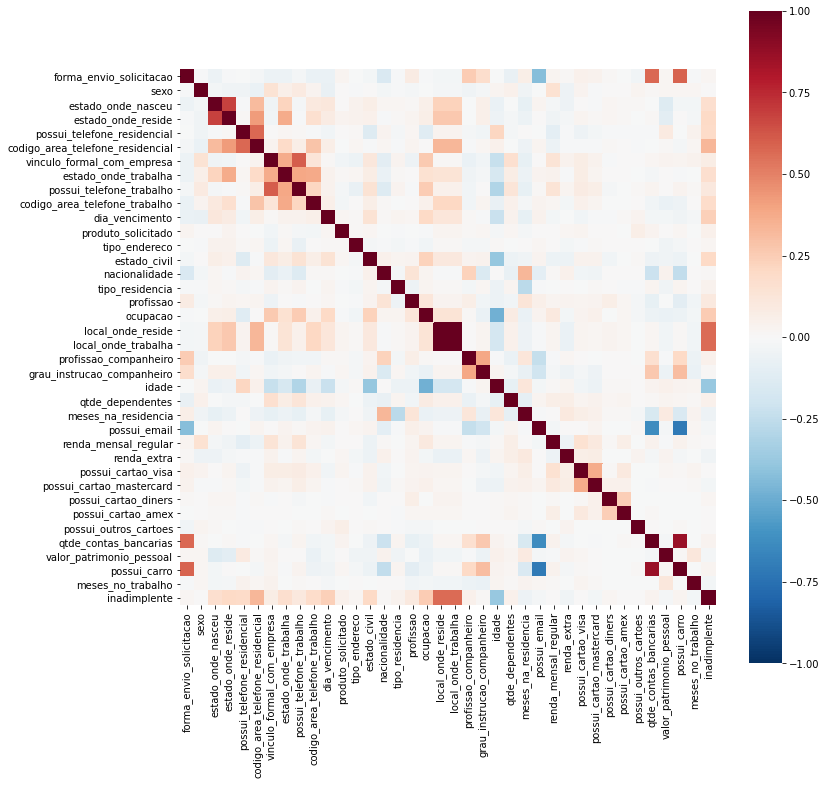

In [48]:
corrmat = df_resampled.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat,cmap=sns.color_palette("RdBu_r", 1000), vmin=-1,vmax=1, square=True)
plt.savefig('CorrelationMatrix.png')

In [49]:
pca = PCA(n_components=0.9, svd_solver = 'full')
pca.fit(scale(df_resampled[input_cols]))
X_PCA_train = pca.transform(scale(df_resampled[input_cols]))

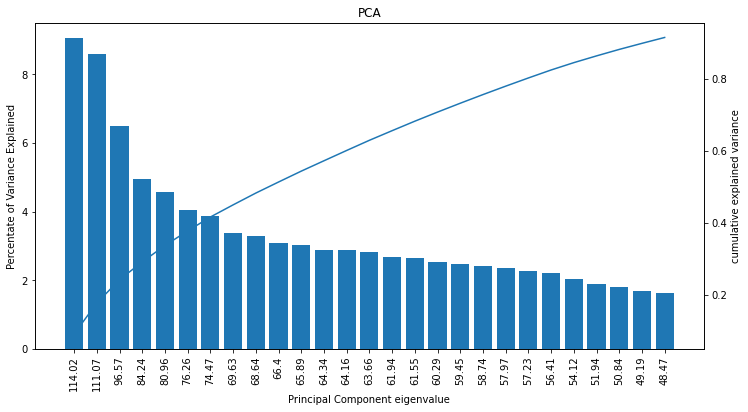

In [50]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
result = pca.explained_variance_ratio_
plt.figure(figsize=(12,6))
plt.bar(x= sorted(np.arange(len(result)),reverse=True), height=sorted(percent_variance,reverse=True),tick_label=np.round(sorted(pca.singular_values_,reverse=True),decimals=2) )
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component eigenvalue')
plt.xticks(rotation=90)
plt.title('PCA')
ax = plt.gca()
# set the xlimits to be the reverse of the current xlimits
ax.set_xlim(ax.get_xlim()[::-1])
# call `draw` to re-render the graph
plt.draw()

axes2 = plt.twinx()
axes2.plot(np.arange(len(result)),sorted(np.cumsum(result),reverse=True ))
axes2.set_ylabel('cumulative explained variance')
plt.savefig('PCA.png')
plt.show()

In [38]:
encoder = CATB_ENC(a=10.221639413432117,sigma=0.0019412656262652876,handle_missing=True)
imputer = KNNImputer(n_neighbors=7)
balancer = SMOTETomek()


In [170]:
union = FeatureUnion([("pca", PCA(n_components=0.9)),
                      ("lda", LinearDiscriminantAnalysis()),
                      ("K_best",SelectKBest(chi2,k=20))
                      ])

In [171]:
"""model = RandomForestClassifier()
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

union_search = {
    'union__K_best__k':Integer(10,37)
}

opt = BayesSearchCV(
    pipe,
    [(union_search, 20)],
    scoring=make_scorer(f1_score),
    cv=5
)

opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = RandomForestClassifier()\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'union\',union),\n    (\'model\',model)\n])\n\nunion_search = {\n    \'union__K_best__k\':Integer(10,37)\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(union_search, 20)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\n\nopt.fit(x_t[input_cols],x_t[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [37]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)
union = FeatureUnion([("pca", PCA(n_components=0.9)),
                      ("lda", LinearDiscriminantAnalysis()),
                      ("K_best",SelectKBest(chi2,k=37))
                      ])

# Model Selection

## Logistic Regression

In [173]:
"""model = LogisticRegression(max_iter=1600)
pipe = pipeline.Pipeline(steps=[
     ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
LR_search = {
   'model__C':Real(0.001,1000,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(LR_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = LogisticRegression(max_iter=1600)\npipe = pipeline.Pipeline(steps=[\n     (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'union\',union),\n    (\'model\',model)\n])\nLR_search = {\n   \'model__C\':Real(0.001,1000,prior=\'log-uniform\')\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(LR_search, 50)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(x_t[input_cols],x_t[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [174]:
x_t.dtypes

produto_solicitado                    int64
dia_vencimento                        int64
forma_envio_solicitacao              object
tipo_endereco                         int64
sexo                                 object
idade                               float64
estado_civil                          int64
qtde_dependentes                    float64
nacionalidade                         int64
estado_onde_nasceu                   object
estado_onde_reside                   object
possui_telefone_residencial          object
codigo_area_telefone_residencial     object
tipo_residencia                       int64
meses_na_residencia                 float64
possui_email                          int64
renda_mensal_regular                float64
renda_extra                         float64
possui_cartao_visa                    int64
possui_cartao_mastercard              int64
possui_cartao_diners                  int64
possui_cartao_amex                    int64
possui_outros_cartoes           

In [175]:
nome_modelo = "LR"
model = LogisticRegression(C=993.0664736563477,max_iter=1600)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5801000000000001,
 'f1_score': 0.5891358134555041,
 'fn': 3979,
 'fp': 4419,
 'precisão': 0.5767695787091643,
 'recall': 0.6021,
 'roc_auc': 0.5801000000000001,
 'tn': 5581,
 'tp': 6021}

## Naive Bayes

In [176]:
nome_modelo = "Naive Bayes"
model = GaussianNB()
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5716,
 'f1_score': 0.6295065317476434,
 'fn': 2707,
 'fp': 5861,
 'precisão': 0.5546148482039887,
 'recall': 0.7293000000000001,
 'roc_auc': 0.5716,
 'tn': 4139,
 'tp': 7293}

In [177]:
int(np.round(np.array([0.5,0.6]))[0])

0

## Random Forest

In [178]:
"""model = RandomForestClassifier()
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

RF_search = {
   'model__n_estimators':Integer(100,500),
    'model__max_depth':Integer(30,50)
}

opt = BayesSearchCV(
    pipe,
    [(RF_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = RandomForestClassifier()\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'union\',union),\n    (\'model\',model)\n])\n\nRF_search = {\n   \'model__n_estimators\':Integer(100,500),\n    \'model__max_depth\':Integer(30,50)\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(RF_search, 50)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(x_t[input_cols],x_t[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [179]:
nome_modelo = "Random Forest"
model = RandomForestClassifier(n_estimators=499,max_depth=30)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe,x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5917000000000001,
 'f1_score': 0.6063393435031983,
 'fn': 3709,
 'fp': 4457,
 'precisão': 0.5852647585986959,
 'recall': 0.6291,
 'roc_auc': 0.5917000000000001,
 'tn': 5543,
 'tp': 6291}

## Catboost

In [180]:
"""model = CatBoostClassifier(verbose=False)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

CATB_search = {
   'model__learning_rate':Real(0.0001,0.1,prior='log-uniform'),
    'model__max_depth':Integer(4,16),
    'model__l2_leaf_reg':Real(1,9)
}

opt = BayesSearchCV(
    pipe,
    [(CATB_search, 20)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = CatBoostClassifier(verbose=False)\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'union\',union),\n    (\'model\',model)\n])\n\nCATB_search = {\n   \'model__learning_rate\':Real(0.0001,0.1,prior=\'log-uniform\'),\n    \'model__max_depth\':Integer(4,16),\n    \'model__l2_leaf_reg\':Real(1,9)\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(CATB_search, 20)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(x_t[input_cols],x_t[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [ ]:
nome_modelo = "Catboost"
model = CatBoostClassifier(l2_leaf_reg=5.409491968380465,
                           learning_rate=0.0003793393560662113,
                           max_depth=11,verbose=False)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],
                        cv=cv, 
                        scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
media,var = armazena_resultado(nome_modelo,scores)
media

In [184]:
clf = CatBoostClassifier()
clf.fit(df_resampled[input_cols],df_resampled[output_col])
feature_importances = pd.DataFrame(clf.get_feature_importance(),
                                   index =input_cols,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

Learning rate set to 0.018385
0:	learn: 0.6813989	total: 4.63ms	remaining: 4.63s
1:	learn: 0.6691089	total: 9.13ms	remaining: 4.55s
2:	learn: 0.6560218	total: 14.1ms	remaining: 4.7s
3:	learn: 0.6461039	total: 18.7ms	remaining: 4.66s
4:	learn: 0.6344468	total: 23.2ms	remaining: 4.61s
5:	learn: 0.6249199	total: 27.8ms	remaining: 4.6s
6:	learn: 0.6145879	total: 32.2ms	remaining: 4.57s
7:	learn: 0.6056980	total: 36.8ms	remaining: 4.56s
8:	learn: 0.5955678	total: 41.4ms	remaining: 4.56s
9:	learn: 0.5860952	total: 46ms	remaining: 4.55s
10:	learn: 0.5781594	total: 50.4ms	remaining: 4.53s
11:	learn: 0.5703863	total: 54.8ms	remaining: 4.51s
12:	learn: 0.5631300	total: 59.1ms	remaining: 4.49s
13:	learn: 0.5544973	total: 63.5ms	remaining: 4.47s
14:	learn: 0.5463208	total: 67.7ms	remaining: 4.45s
15:	learn: 0.5389624	total: 72.1ms	remaining: 4.43s
16:	learn: 0.5316751	total: 76.4ms	remaining: 4.42s
17:	learn: 0.5257719	total: 80.8ms	remaining: 4.41s
18:	learn: 0.5194485	total: 85.3ms	remaining: 4.

,importance
idade,17.047755
local_onde_reside,13.780216
local_onde_trabalha,11.451726
possui_telefone_residencial,6.736029
meses_na_residencia,5.726205
codigo_area_telefone_residencial,5.130780
dia_vencimento,4.497409
renda_mensal_regular,4.081609
estado_civil,3.734707
qtde_dependentes,2.773657


In [ ]:
feature_importances.to_csv("Feature_importances.csv")

## Light GBM

In [185]:
"""model = lgb(n_estimators=1000)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

lgb_search = {
   'model__learning_rate':Real(0.0001,1,prior='log-uniform'),
    'model__max_depth':Integer(4,30),
    'model__num_leaves':Integer(24, 80),
    'model__feature_fraction': Real(0.1, 0.9),
    'model__bagging_fraction': Real(0.8, 1),
    'model__max_bin':Integer(20,90),
    'model__min_data_in_leaf': Integer(20, 80),
    'model__min_sum_hessian_in_leaf':Real(0,100),
    'model__subsample': Real(0.01, 1.0),
    'model__reg_alpha':Real(0,100,prior='uniform'),
    'model__reg_lambda':Real(0,100,prior='uniform')

}

opt = BayesSearchCV(
    pipe,
    [(lgb_search, 50)],
    scoring=make_scorer(f1_score),
    cv=cv
)
opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = lgb(n_estimators=1000)\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'union\',union),\n    (\'model\',model)\n])\n\nlgb_search = {\n   \'model__learning_rate\':Real(0.0001,1,prior=\'log-uniform\'),\n    \'model__max_depth\':Integer(4,30),\n    \'model__num_leaves\':Integer(24, 80),\n    \'model__feature_fraction\': Real(0.1, 0.9),\n    \'model__bagging_fraction\': Real(0.8, 1),\n    \'model__max_bin\':Integer(20,90),\n    \'model__min_data_in_leaf\': Integer(20, 80),\n    \'model__min_sum_hessian_in_leaf\':Real(0,100),\n    \'model__subsample\': Real(0.01, 1.0),\n    \'model__reg_alpha\':Real(0,100,prior=\'uniform\'),\n    \'model__reg_lambda\':Real(0,100,prior=\'uniform\')\n\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(lgb_search, 50)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(x_t[input_cols],x_t[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % o

In [186]:
nome_modelo = "LGBM"
model = lgb(bagging_fraction = 0.8973693288922182,
            feature_fraction = 0.8919250170451992,
            learning_rate = 0.00012265507016257372,
            n_estimators=1000,
            max_bin = 22,
            max_depth = 29,
            min_data_in_leaf = 53,
            min_sum_hessian_in_leaf = 3,
            num_leaves = 72,
            reg_alpha = 60.83831537997138,
            reg_lambda = 16.518974566272195,
            subsample = 0.9274967636572905,
            )

pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],
                        cv=cv, 
                        scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5855,
 'f1_score': 0.6198231732630028,
 'fn': 3232,
 'fp': 5058,
 'precisão': 0.5722686047588732,
 'recall': 0.6768000000000001,
 'roc_auc': 0.5855,
 'tn': 4942,
 'tp': 6768}

## XGBOOST

In [187]:
"""model = xg.XGBClassifier(n_estimators=1000)

pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

xgb_search = {
   'model__eta':Real(0.0001,1,prior='log-uniform'),
   'model__min_child_weight':Real(0.001, 1000,prior='log-uniform'),
    'model__max_depth':Integer(3,20),
    'model__gamma': Real(0.001, 1000,prior='log-uniform'),
    'model__max_bin':Integer(20,90),
    'model__subsample': Real(0.5, 1.0,prior='uniform'),
    'model__colsample_bytree ': Real(0.5, 1.0,prior='uniform'),
    'model__reg_alpha':Real(0.001,100,prior='log-uniform'),
    'model__reg_lambda':Real(0.001,1000,prior='log-uniform')

}

opt = BayesSearchCV(
    pipe,
    [(xgb_search, 50)],
    scoring=make_scorer(f1_score),
    cv=5
)
opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = xg.XGBClassifier(n_estimators=1000)\n\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'union\',union),\n    (\'model\',model)\n])\n\nxgb_search = {\n   \'model__eta\':Real(0.0001,1,prior=\'log-uniform\'),\n   \'model__min_child_weight\':Real(0.001, 1000,prior=\'log-uniform\'),\n    \'model__max_depth\':Integer(3,20),\n    \'model__gamma\': Real(0.001, 1000,prior=\'log-uniform\'),\n    \'model__max_bin\':Integer(20,90),\n    \'model__subsample\': Real(0.5, 1.0,prior=\'uniform\'),\n    \'model__colsample_bytree \': Real(0.5, 1.0,prior=\'uniform\'),\n    \'model__reg_alpha\':Real(0.001,100,prior=\'log-uniform\'),\n    \'model__reg_lambda\':Real(0.001,1000,prior=\'log-uniform\')\n\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(xgb_search, 50)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\nopt.fit(x_t[input_cols],x_t[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % op

In [188]:
nome_modelo = "XGBOOST"
model = xg.XGBClassifier(colsample_bytree = 0.7418419224939272,
                         eta = 0.45633573765106905,
                         gamma = 39.63998610324133,
                         max_bin = 82,
                         max_depth = 4,
                         min_child_weight = 0.44619360202235636,
                         reg_alpha = 18.688752405175503,
                         reg_lambda = 44.516295463053766,
                         subsample = 0.7518787153908242
                         )

pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],
                        cv=cv, 
                        scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5851,
 'f1_score': 0.6185003587527129,
 'fn': 3267,
 'fp': 5031,
 'precisão': 0.5723440925525638,
 'recall': 0.6733,
 'roc_auc': 0.5851,
 'tn': 4969,
 'tp': 6733}

## SVM

In [234]:
model = Pipeline([
                  ("Nys",Nystroem(gamma=0.1, random_state=42, n_components=100)),
                  ("SVM",LinearSVC(C=0.1))
])

pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

SVM_search = {
   'model__Nys__n_components':Integer(300,500),
   'model__Nys__gamma': Real(0.001,1,prior='log-uniform'),
   'model__SVM__C':Real(0.00001,0.01,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(SVM_search, 50)],
    scoring=make_scorer(f1_score),
    cv=cv
)
opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.6537339525382818
best params: OrderedDict([('model__Nys__gamma', 0.19825149923858046), ('model__Nys__n_components', 371), ('model__SVM__C', 0.001)])


In [235]:
model = Pipeline([
                  ("Nys",Nystroem(gamma=0.10119268595677983, random_state=42, n_components=328)),
                  ("SVM",LinearSVC(C=0.00989507703903171))
])

nome_modelo = "SVM"
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5057499999999999,
 'f1_score': 0.5722748681437068,
 'fn': 2215,
 'fp': 7670,
 'precisão': 0.5059106236812281,
 'recall': 0.7785000000000001,
 'roc_auc': 0.5057499999999999,
 'tn': 2330,
 'tp': 7785}

In [221]:
var

{'acuracia': 4.6339999999999966e-05,
 'f1_score': 8.756786885568622e-06,
 'fn': -1,
 'fp': -1,
 'precisão': 1.6730225235285654e-05,
 'recall': 3.564000000000002e-05,
 'roc_auc': 4.6339999999999966e-05,
 'tn': -1,
 'tp': -1}

## Neural Network

In [40]:
class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, layer1=10, layer2=10, layer3=10,learning_rate_init=0.001):
        self.layer1 = layer1
        self.layer2 = layer2
        self.layer3 = layer3
        self.learning_rate_init = learning_rate_init

    def fit(self, X, y):
        model = MLPClassifier(
            hidden_layer_sizes=[self.layer1, self.layer2, self.layer3],
            activation='logistic',
            learning_rate_init = self.learning_rate_init
        )
        model.fit(X, y)
        self.model = model
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.score(X, y)


In [193]:
"""model = MLPWrapper(42,3,35)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

NN_search = {
    'model__layer1': Integer(1,2*(x_t[input_cols].shape[1])),
    'model__layer2': Integer(1,2*(x_t[input_cols].shape[1])),
    'model__layer3': Integer(1,2*(x_t[input_cols].shape[1])),
    'model__learning_rate_init':Real(0.0001,0.1,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(NN_search, 50)],
    scoring=make_scorer(f1_score),
    cv=cv
)

opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))"""

'model = MLPWrapper(42,3,35)\npipe = pipeline.Pipeline(steps=[\n    (\'encoder\',encoder),\n    (\'imputer\',imputer),\n    (\'balancer\',balancer),\n    (\'union\',union),\n    (\'model\',model)\n])\n\nNN_search = {\n    \'model__layer1\': Integer(1,2*(x_t[input_cols].shape[1])),\n    \'model__layer2\': Integer(1,2*(x_t[input_cols].shape[1])),\n    \'model__layer3\': Integer(1,2*(x_t[input_cols].shape[1])),\n    \'model__learning_rate_init\':Real(0.0001,0.1,prior=\'log-uniform\')\n}\n\nopt = BayesSearchCV(\n    pipe,\n    [(NN_search, 50)],\n    scoring=make_scorer(f1_score),\n    cv=5\n)\n\nopt.fit(x_t[input_cols],x_t[output_col])\nprint("val. score: %s" % opt.best_score_)\n#print("test score: %s" % opt.score(X_test, y_test))\nprint("best params: %s" % str(opt.best_params_))'

In [229]:
len(x_t[input_cols].columns)

37

In [216]:
nome_modelo = "Neural Network"

model = MLPWrapper(42,3,35,0.001)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.585,
 'f1_score': 0.6328571104637463,
 'fn': 2833,
 'fp': 5467,
 'precisão': 0.5674871698387683,
 'recall': 0.7166999999999999,
 'roc_auc': 0.585,
 'tn': 4533,
 'tp': 7167}

## KNN

In [202]:
"""model = KNeighborsClassifier()

pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

clf = GridSearchCV(pipe, {'model__n_neighbors':[3,4,5,6,7,8,9,10,11]}, cv=cv)
clf.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % clf.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(clf.best_params_))"""

val. score: 0.5342
best params: {'model__n_neighbors': 9}


In [208]:
model = KNeighborsClassifier(n_neighbors=9)
nome_modelo = "KNN"
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5342,
 'f1_score': 0.5348818095561545,
 'fn': 4642,
 'fp': 4674,
 'precisão': 0.5341591140855272,
 'recall': 0.5358,
 'roc_auc': 0.5342,
 'tn': 5326,
 'tp': 5358}

## QDA

In [239]:
model = QuadraticDiscriminantAnalysis()
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

QDA_search = {
    'model__reg_param':Real(0.00005,0.0005,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(QDA_search, 50)],
    scoring=make_scorer(f1_score),
    cv=cv
)

opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.6381439388137965
best params: OrderedDict([('model__reg_param', 5.0031232352585586e-05)])


In [240]:
model = QuadraticDiscriminantAnalysis(reg_param=0.00005)
nome_modelo= "QDA"
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5574000000000001,
 'f1_score': 0.638093059724073,
 'fn': 2184,
 'fp': 6668,
 'precisão': 0.539806565481376,
 'recall': 0.7816,
 'roc_auc': 0.5574000000000001,
 'tn': 3332,
 'tp': 7816}

## ADABOOST

In [254]:
model = AdaBoostClassifier(base_estimator=svm,n_estimators=100)
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])

ADA_search = {
    'model__learning_rate':Real(0.0001,1,prior='log-uniform')
}

opt = BayesSearchCV(
    pipe,
    [(ADA_search, 50)],
    scoring=make_scorer(f1_score),
    cv=cv
)

opt.fit(x_t[input_cols],x_t[output_col])
print("val. score: %s" % opt.best_score_)
#print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.6460764636604175
best params: OrderedDict([('model__learning_rate', 0.002092145432704537)])


In [44]:
model = AdaBoostClassifier(n_estimators=100,learning_rate=0.002092145432704537)
nome_modelo= "ADABOOST"
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': nan,
 'f1_score': nan,
 'fn': nan,
 'fp': nan,
 'precisão': nan,
 'recall': nan,
 'roc_auc': nan,
 'tn': nan,
 'tp': nan}

## Ensemble

In [43]:
RF = RandomForestClassifier(n_estimators=499,max_depth=30)
"""RF = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

LR = LogisticRegression(C=993.0664736563477,max_iter=1600)
"""LR = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

NB = GaussianNB()
"""NB = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

CATB = CatBoostClassifier(l2_leaf_reg=5.409491968380465,
                           learning_rate=0.0003793393560662113,
                           max_depth=11,verbose=False)
"""CATB = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

LGB = lgb(bagging_fraction = 0.8973693288922182,
            feature_fraction = 0.8919250170451992,
            learning_rate = 0.00012265507016257372,
            n_estimators=1000,
            max_bin = 22,
            max_depth = 29,
            min_data_in_leaf = 53,
            min_sum_hessian_in_leaf = 3,
            num_leaves = 72,
            reg_alpha = 60.83831537997138,
            reg_lambda = 16.518974566272195,
            subsample = 0.9274967636572905,
            )

"""LGB = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

XG = xg.XGBClassifier(colsample_bytree = 0.7418419224939272,
                         eta = 0.45633573765106905,
                         gamma = 39.63998610324133,
                         max_bin = 82,
                         max_depth = 4,
                         min_child_weight = 0.44619360202235636,
                         reg_alpha = 18.688752405175503,
                         reg_lambda = 44.516295463053766,
                         subsample = 0.7518787153908242
                         )

"""XG = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

SVM = Pipeline([
                  ("Nys",Nystroem(gamma=0.10119268595677983, random_state=42, n_components=328)),
                  ("SVM",LinearSVC(C=0.00989507703903171))
])
"""SVM = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

NN = MLPWrapper(42,3,35,0.001)
"""NN = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

KNN = KNeighborsClassifier(n_neighbors=9)
"""KNN = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

QDA = QuadraticDiscriminantAnalysis(reg_param=0.00005)
"""QDA = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""

ADA = AdaBoostClassifier(n_estimators=100,learning_rate=0.002092145432704537)
"""ADA = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])"""


"ADA = pipeline.Pipeline(steps=[\n    ('encoder',encoder),\n    ('imputer',imputer),\n    ('balancer',balancer),\n    ('union',union),\n    ('model',model)\n])"

In [45]:
level0 = list()
level0.append(('svm', SVM))
level0.append(('bayes', NB))
level0.append(('ada', ADA))
level0.append(('catb', CATB))
level0.append(('qda', QDA))

In [46]:
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [47]:
nome_modelo= "stack"
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
scores = cross_validate(pipe, x_t[input_cols], x_t[output_col],cv=cv, scoring=scoring,return_train_score=False)
scores_geral[nome_modelo] = scores
#print(np.sum(scores['test_tp']),np.sum(scores['test_tn']),np.sum(scores['test_fp']),np.sum(scores['test_fn']))
#scores
media,var = armazena_resultado(nome_modelo,scores)
media

{'acuracia': 0.5843499999999999,
 'f1_score': 0.6263759843873575,
 'fn': 3023,
 'fp': 5290,
 'precisão': 0.5686865393433821,
 'recall': 0.6977,
 'roc_auc': 0.5843499999999999,
 'tn': 4710,
 'tp': 6977}

## Classifier Analysis

In [1]:
for i in scores_geral:
    if "fit_time" in scores_geral[i]:
        del(scores_geral[i]["fit_time"])
    if "score_time" in scores_geral[i]:
        del(scores_geral[i]["score_time"])

NameError: ignored

In [257]:
metricas = []
for metric in scores_geral['SVM']:
    metricas.append(metric)
count_metrica = 0
scores_boxplot = {}
for met in range(len(metricas)):
    dic_score = {}
    for modelo in scores_geral:
        dic_score[modelo] = scores_geral[modelo][metricas[count_metrica]]
    scores_boxplot[metricas[count_metrica]] = pd.DataFrame(dic_score)
    count_metrica+=1

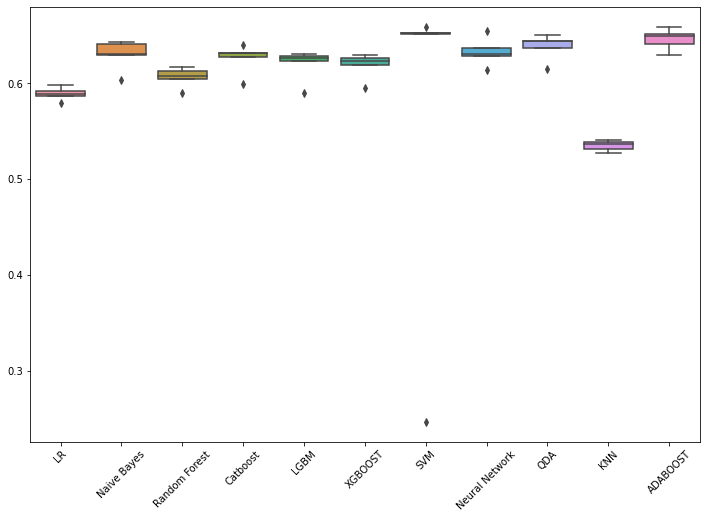

In [258]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(data=scores_boxplot['test_f1_score'])
plt.xticks(rotation=45)
plt.savefig('models_f1.png')

# Final Result

In [236]:
model = Pipeline([
                  ("Nys",Nystroem(gamma=0.10119268595677983, random_state=42, n_components=328)),
                  ("SVM",LinearSVC(C=0.00989507703903171))
])
pipe = pipeline.Pipeline(steps=[
    ('encoder',encoder),
    ('imputer',imputer),
    ('balancer',balancer),
    ('union',union),
    ('model',model)
])
pipe.fit(x_t[input_cols],x_t[output_col])
y_pred = np.array(pipe.predict(x_teste[input_cols]),dtype=np.int16)

In [237]:
result = pd.DataFrame({'id_solicitante':list(x_teste.index + 1),'inadimplente':y_pred})
result.to_csv('prediction1.csv',index=False)